In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import interpolate
import matplotlib


In [2]:
def diff_term_tsallis():
    u_s = 1
    du = 0.001
    uu = np.arange(0,u_s,du) #velocity space
    q = 1.5
    #parameters for the parameter sweep of our velocity profile
    d_lam = 1
    lam_lim_lower = 50
    lam_lim_upper = 50
    lam_1, lam_2 = np.meshgrid(np.arange(-lam_lim_lower,lam_lim_upper,d_lam),np.arange(-lam_lim_lower,lam_lim_upper,d_lam))

    #arrays to be populated
    u_bar = np.ones(lam_1.shape)
    chi2 = np.ones(lam_1.shape)
    ediffEnt_sweep = np.ones(lam_1.shape)
    tauzEnt_sweep = np.ones(lam_1.shape)

    for i in range(0,lam_1.shape[0]):
        for j in range(0,lam_2.shape[1]):
            lam_1i = lam_1[i,j]
            lam_2j = lam_2[i,j]
            f = (1 + uu**2*lam_1i + uu**3*lam_2j) #distribution function
            #checking for negatives:
            f[f<0] = np.nan
            f = f**(1/(q-1))
            f /= np.trapz(f)*du #normalizing

            #finding mean velocity:          
            u_bar[i,j] = np.trapz(f*uu)*du

            #shape_factor
            chi2[i,j] = np.trapz(f*uu*uu)*du/u_bar[i,j]**2

            #energy diffusion:
            ediffEnt_sweep[i,j] = np.trapz(1/f)*du

            #basal shear
            tauzEnt_sweep[i,j] = 1/f[0]
    
    #plt.plot(chi2.flatten(),ediffEnt_sweep.flatten()/u_bar.flatten()**2,'x')
    plt.plot(chi2.flatten(),ediffEnt_sweep.flatten()/u_bar.flatten()**2,'. k')
    plt.yscale('log')
    plt.xlim([1.0,1.3])

    #creating interpolating functions for energy diffusion and basal shear
    #ediffEnt = interpolate.LinearNDInterpolator(list(zip(u_bar.flatten(),chi2.flatten())),ediffEnt_sweep.flatten(),fill_value = 0)
    #tauzEnt = interpolate.LinearNDInterpolator(list(zip(u_bar.flatten(),chi2.flatten())),tauzEnt_sweep.flatten(),fill_value = 0)

In [3]:
def diff_term_orig():
    #setting the same resolution as the OpenFOAM simulations
    dz = 1/160
    zz = np.arange(0,161,1)/160
    r = np.arange(20,0.1,-0.1)
    ediffEnt = r*0
    chi2Ent = r*0
    tauzEnt = r*0
    for i in range(0,r.shape[0]):
        #using maximum entropy solution branch in which \lambda = 0
        uEnt = 1 - (1-zz)**r[i]
        uEnt /= np.trapz(uEnt)*dz
        chi2Ent[i] = np.trapz(uEnt**2)*dz 
        ediffEnt[i] = np.trapz((uEnt[1:]-uEnt[0:-1])**2)/dz
        tauzEnt[i] = (uEnt[2]-uEnt[0])/(2*dz)
    #plt.plot(chi2Ent,r)
    #plt.pause(10000)
    #plt.plot(chi2Ent,ediffEnt,'r')
    plt.plot(chi2Ent,ediffEnt,'r')
    return tauzEnt, ediffEnt, chi2Ent, r

Text(0, 0.5, 'energy diffusion')

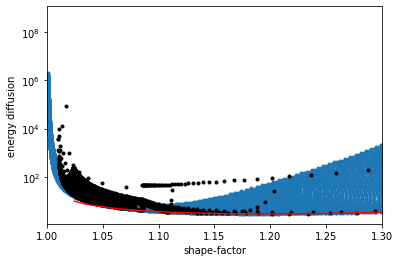

In [4]:
def diff_term():
    u_s = 1
    du = 0.001
    uu = np.arange(0,u_s,du) #velocity space

    #parameters for the parameter sweep of our velocity profile
    d_lam = 0.2
    lam_lim_lower = 20
    lam_lim_upper = 0
    lam_1, lam_2 = np.meshgrid(np.arange(-lam_lim_lower,lam_lim_upper,d_lam),np.arange(-lam_lim_lower,lam_lim_upper,d_lam))

    #arrays to be populated
    u_bar = np.ones(lam_1.shape)
    chi2 = np.ones(lam_1.shape)
    ediffEnt_sweep = np.ones(lam_1.shape)
    tauzEnt_sweep = np.ones(lam_1.shape)

    for i in range(0,lam_1.shape[0]):
        for j in range(0,lam_2.shape[1]):
            lam_1i = lam_1[i,j]
            lam_2j = lam_2[i,j]
            f = np.exp(-uu**2*lam_1i + uu**3*lam_2j) #distribution function
            f /= np.trapz(f)*du #normalizing

            #finding mean velocity:          
            u_bar[i,j] = np.trapz(f*uu)*du

            #shape_factor
            chi2[i,j] = np.trapz(f*uu*uu)*du/u_bar[i,j]**2

            #energy diffusion:
            ediffEnt_sweep[i,j] = np.trapz(1/f)*du

            #basal shear
            tauzEnt_sweep[i,j] = 1/f[0]
    
    #plt.plot(chi2.flatten(),ediffEnt_sweep.flatten()/u_bar.flatten()**2,'x')
    plt.plot(chi2.flatten(),ediffEnt_sweep.flatten()/u_bar.flatten()**2,'.')
    plt.yscale('log')
    plt.xlim([1.0,1.3])

    #creating interpolating functions for energy diffusion and basal shear
    ediffEnt = interpolate.LinearNDInterpolator(list(zip(u_bar.flatten(),chi2.flatten())),ediffEnt_sweep.flatten(),fill_value = 0)
    tauzEnt = interpolate.LinearNDInterpolator(list(zip(u_bar.flatten(),chi2.flatten())),tauzEnt_sweep.flatten(),fill_value = 0)


    return tauzEnt, ediffEnt

tauzEnt, ediffEnt = diff_term()
diff_term_tsallis()
a,b,c,d = diff_term_orig()
plt.xlabel('shape-factor')
plt.ylabel('energy diffusion')